## **13. 이상치 탐지**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

### **데이터 탐색**

In [2]:
"""
    데이터셋 로딩
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

path = './data/'
file = 'AirQualityUCI_refined.csv'

df = pd.read_csv(
    path + file,
    index_col=[0],
    parse_dates=[0],
    date_parser=parser
)

df.head()

C:\Users\hj\AppData\Local\Temp\ipykernel_5508\494520007.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


<Axes: xlabel='Datetime'>

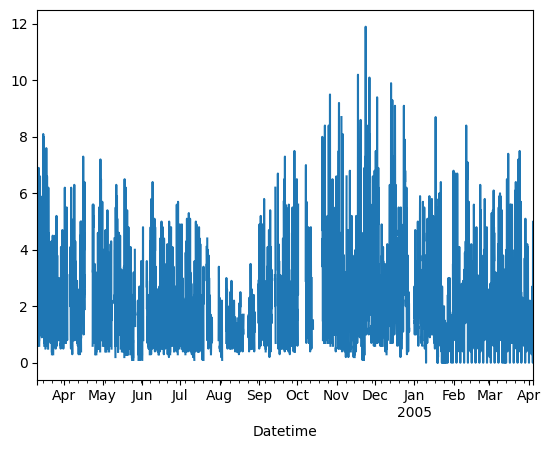

In [4]:
# [+] 일산화탄소 변수 (CO(GT)) 시각화
df['CO(GT)'].plot()

In [5]:
# [+] 결측 데이터 처리: 선형 보간
co = df['CO(GT)'].copy() # Series 복사
co.interpolate(inplace = True) # 선형 보간

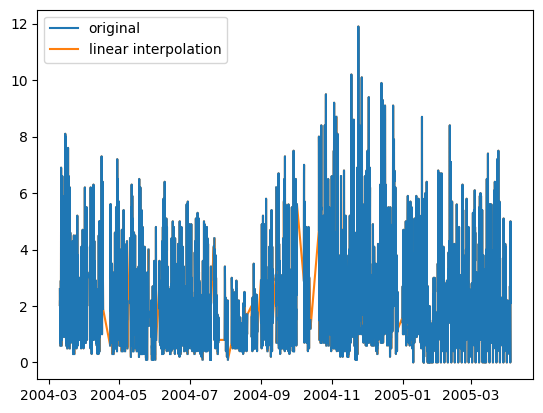

In [6]:
# 결측치 처리 결과 시각화
plt.plot(df['CO(GT)'], label='original', zorder=2)
plt.plot(co, label='linear interpolation', zorder=1)
plt.legend(loc='best')
plt.show()

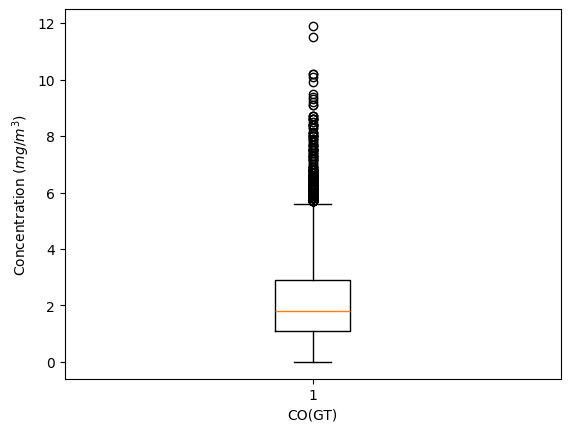

In [7]:
# [+] 이상치 시각화: 박스플롯
plt.boxplot(co)
plt.xlabel('CO(GT)')
plt.ylabel('Concentration (${mg/m^3}$)')
plt.show()

In [8]:
# [+] 변수 간 상관관계 측정
corr_matrix = df.corr()
corr_matrix

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
CO(GT),1.000000,0.877203,0.914973,0.792557,-0.701703,0.679262,0.639470,0.851403,0.040218,0.065809,0.845144
PT08.S1(CO),0.877203,1.000000,0.892964,0.713654,-0.771938,0.641529,0.682881,0.899324,0.114606,0.135324,0.883795
PT08.S2(NMHC),0.914973,0.892964,1.000000,0.704435,-0.796703,0.646245,0.777254,0.880578,-0.090380,0.186933,0.981950
NOx(GT),0.792557,0.713654,0.704435,1.000000,-0.655707,0.763111,0.233731,0.787046,0.221032,-0.149323,0.626638
PT08.S3(NOx),-0.701703,-0.771938,-0.796703,-0.655707,1.000000,-0.652083,-0.538468,-0.796569,-0.056740,-0.232017,-0.735744
NO2(GT),0.679262,0.641529,0.646245,0.763111,-0.652083,1.000000,0.157360,0.708128,-0.091759,-0.335022,0.544039
PT08.S4(NO2),0.639470,0.682881,0.777254,0.233731,-0.538468,0.157360,1.000000,0.591144,-0.032188,0.629641,0.765731
PT08.S5(O3),0.851403,0.899324,0.880578,0.787046,-0.796569,0.708128,0.591144,1.000000,0.124956,0.070751,0.865689
RH,0.040218,0.114606,-0.090380,0.221032,-0.056740,-0.091759,-0.032188,0.124956,1.000000,0.167971,-0.061681
AH,0.065809,0.135324,0.186933,-0.149323,-0.232017,-0.335022,0.629641,0.070751,0.167971,1.000000,0.167972


In [9]:
# 일산화탄소와 가장 상관관계가 약한 변수 선택
rh = df['RH'].copy().interpolate() # RH: 상대습도

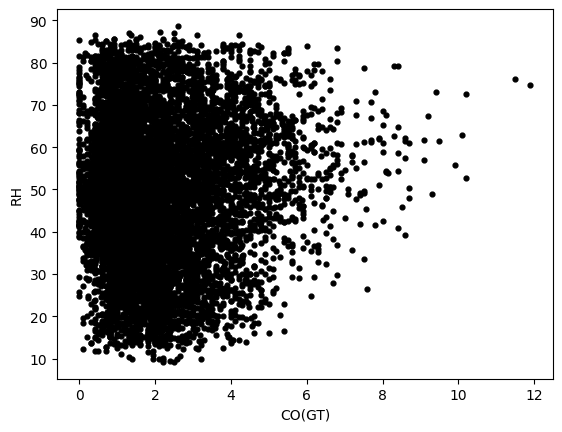

In [10]:
# 산포도 시각화
plt.scatter(co, rh, s=12, c='black')
plt.xlabel('CO(GT)')
plt.ylabel('RH')
plt.show()

In [11]:
# 일산화탄소와 가장 상관관계가 강한 변수 선택
nmhc = df['PT08.S2(NMHC)'].copy().interpolate() # NMHC: 비메탄계 탄화수소

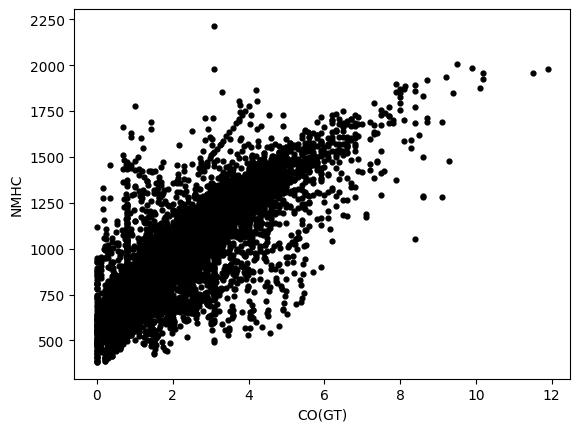

In [12]:
# 산포도 시각화
plt.scatter(co, nmhc, s=12, c='black')
plt.xlabel('CO(GT)')
plt.ylabel("NMHC")
plt.show()

### **사분위수 범위 기반 이상치 탐지**

In [13]:
# [+] Q1, Q2, Q3 계산
q1 = co.quantile(0.25)  # 하위 25%
q2 = co.quantile(0.5)
q3 = co.quantile(0.75)
print(q1, q2, q3)

1.1 1.8 2.9


In [14]:
co

Datetime
2004-03-10 18:00:00    2.6
2004-03-10 19:00:00    2.0
2004-03-10 20:00:00    2.2
2004-03-10 21:00:00    2.2
2004-03-10 22:00:00    1.6
                      ... 
2005-04-04 10:00:00    3.1
2005-04-04 11:00:00    2.4
2005-04-04 12:00:00    2.4
2005-04-04 13:00:00    2.1
2005-04-04 14:00:00    2.2
Name: CO(GT), Length: 9357, dtype: float64

In [15]:
# [+] IQR, 상한(upper_fence), 하한(lower_fence)
iqr = q3 - q1
upper_fence = q3 + (1.5 * iqr)
lower_fence = q1 - (1.5 * iqr)
print(iqr, upper_fence, lower_fence)

1.7999999999999998 5.6 -1.5999999999999996


In [17]:
# [+] 이상치 선택
outliers = co.loc[(co > upper_fence) | (co <lower_fence)]
outliers

Datetime
2004-03-11 19:00:00    6.9
2004-03-11 20:00:00    6.1
2004-03-12 20:00:00    6.6
2004-03-14 20:00:00    5.9
2004-03-15 09:00:00    8.1
                      ... 
2005-03-23 19:00:00    6.2
2005-03-23 20:00:00    7.2
2005-03-24 19:00:00    5.9
2005-03-24 20:00:00    7.5
2005-03-25 19:00:00    5.7
Name: CO(GT), Length: 224, dtype: float64

In [18]:
# [+] 이상치 여부 마스킹
mask = co.index.isin(outliers.index)
mask[:50]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

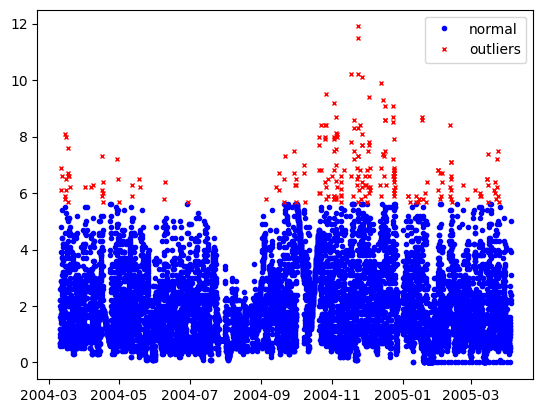

In [19]:
# 정상 데이터 / 이상치 시각화
plt.plot(co[~mask], label='normal', color='blue',
    marker='o', markersize=3, linestyle='None')
plt.plot(outliers, label='outliers', color='red',
    marker='x', markersize=3, linestyle='None')
plt.legend(loc='best')

In [20]:
# [+] 이상치 제거
co_refined = co.copy()
co_refined[mask] = np.nan
co_refined[mask]

Datetime
2004-03-11 19:00:00   NaN
2004-03-11 20:00:00   NaN
2004-03-12 20:00:00   NaN
2004-03-14 20:00:00   NaN
2004-03-15 09:00:00   NaN
                       ..
2005-03-23 19:00:00   NaN
2005-03-23 20:00:00   NaN
2005-03-24 19:00:00   NaN
2005-03-24 20:00:00   NaN
2005-03-25 19:00:00   NaN
Name: CO(GT), Length: 224, dtype: float64

<Axes: xlabel='Datetime'>

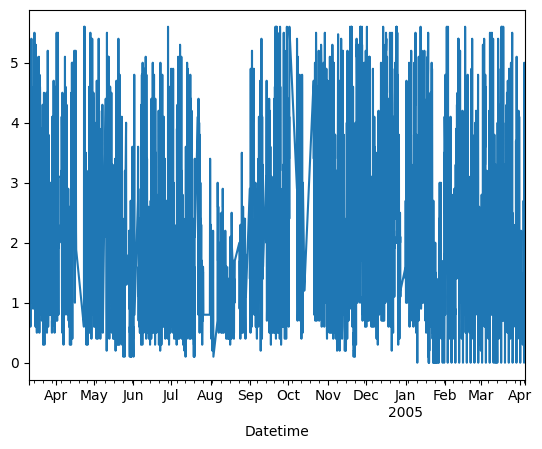

In [21]:
# [+] 제거된 이상치에 대한 대치: 선형보간
co_refined.interpolate(inplace=True)
co_refined.plot()

### **Z-점수 기반 이상치 탐지**

C:\Users\hj\AppData\Local\Temp\ipykernel_5508\4145667950.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(co)


<Axes: xlabel='CO(GT)', ylabel='Density'>

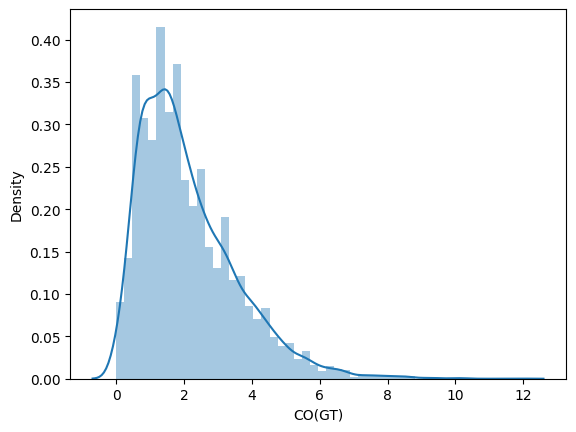

In [24]:
# 일산화탄소 변수 분포 시각화
import seaborn as sns
sns.distplot(co)

In [25]:
# [+] 평균, 표준편차
mean = np.mean(co)
std = np.std(co)
print(mean, std)

2.126146200705354 1.4369815748596482


In [28]:
# [+] 데이터 포인트별 Z-점수 계산
outliers = []
thres = 3

for i in co:
    z_score = (i - mean) / std
    if (np.abs(z_score) > thres):
        print(z_score)
        outliers.append(i)

3.322139881828975
3.1133689377552476
4.1572236581238835
4.087633343432642
3.0437786230640054
3.1133689377552476
3.8092720846676715
3.1829592524464903
3.1133689377552476
3.6005011405939444
3.530910825902702
3.0437786230640054
3.0437786230640054
3.1829592524464903
3.0437786230640054
3.6005011405939444
3.1829592524464903
3.7396817699764293
3.0437786230640054
3.1829592524464903
3.3917301965202173
4.087633343432642
3.878862399358914
3.2525495671377325
4.3659946021976115
3.2525495671377325
4.018043028741399
4.3659946021976115
4.087633343432642
4.3659946021976115
5.131488063801277
3.0437786230640054
3.1133689377552476
3.7396817699764293
3.2525495671377325
4.018043028741399
4.087633343432642
4.922717119727549
3.3917301965202173
3.786075313103924
4.180420429687631
4.574765546271338
4.1572236581238835
4.087633343432642
3.1133689377552476
3.2525495671377325
3.9484527140501564
5.618620266639974
3.1133689377552476
3.7396817699764293
3.530910825902702
4.296404287506369
4.505175231580095
3.3221398818

In [46]:
# [+] 이상치 선택
outliers = co.loc[np.abs((co-mean) / std) > 3]

In [47]:
# [+] 마스킹
mask = co.index.isin(outliers.index)
mask[:50]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

C:\Users\hj\AppData\Local\Temp\ipykernel_5508\802724061.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(co, axlabel='CO(GT)', label='original')
C:\Users\hj\AppData\Local\Temp\ipykernel_5508\802724061.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(co[~mask], label='outliers removed')


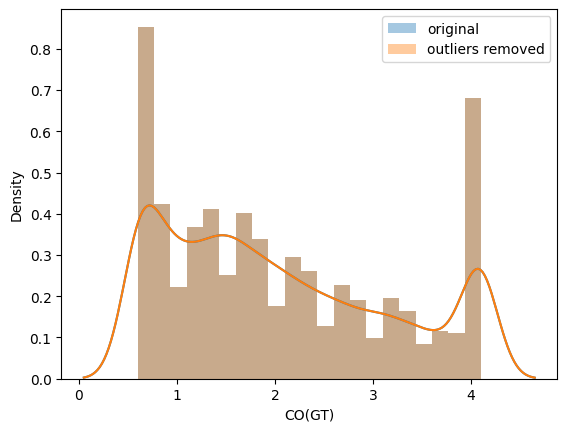

In [48]:
# 이상치 제거 전/후 분포 시각화
sns.distplot(co, axlabel='CO(GT)', label='original')
sns.distplot(co[~mask], label='outliers removed')
plt.legend(loc='best')
plt.show()

In [49]:
# 기타 이상치 제거 방법: Flooring, Capping
floor = co.quantile(0.1)
cap = co.quantile(0.9)

co.loc[co < floor] = floor
co.loc[co > cap] = cap

<Axes: xlabel='Datetime'>

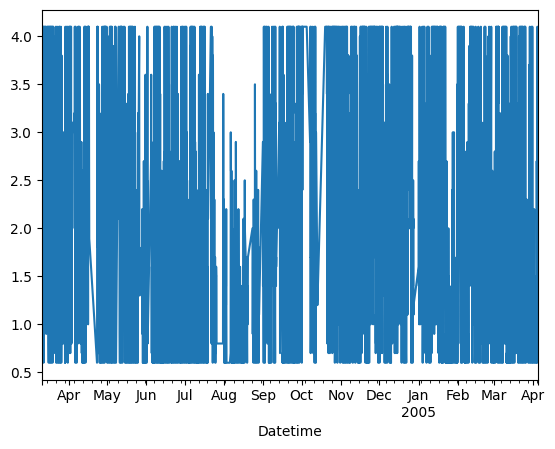

In [50]:
# 시각화
co.plot()